# Environment Setup

In [1]:
import os

In [ ]:
import getpass
personal_access_token = getpass.getpass("Enter your GitHub personal access token: ")

In [2]:
github_username = "AnFreTh"
repo_name = "NAMgcv"
branch_name = "dev_bnam_flax_mile"

In [ ]:
clone_url = (
    f"https://"
    f"{github_username}:{personal_access_token}"
    f"@github.com/"
    f"{github_username}/"
    f"{repo_name}.git"
)
!git clone -b $branch_name $clone_url

In [3]:
github_username = "AleksLyubenov"
repo_name = "MILE"
branch_name = "main"

In [ ]:
clone_url = (
    f"https://"
    f"{github_username}:{personal_access_token}"
    f"@github.com/"
    f"{github_username}/"
    f"{repo_name}.git"
)
!git clone -b $branch_name $clone_url

In [ ]:
os.chdir(repo_name)
!pip install .

In [ ]:
os.chdir("/home/sagemaker-user/NAMgcv")
!pip install -r requirements.txt

# Imports

In [1]:
import os

from typing import Tuple, Dict, Any

import pandas as pd
import numpy as np
import jax.numpy as jnp

import numpyro

from scipy.stats import norm

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
num_chains = 10
n_devices = min(os.cpu_count(), num_chains)
os.environ['XLA_FLAGS'] = f'--xla_force_host_platform_device_count={n_devices}'

import jax
# from jax.lib import xla_bridge
# print(xla_bridge.get_backend().platform)

print(f"Default backend for JAX: {jax.default_backend()}")
print(
    f"Number of devices available on default backend: "
    f"{jax.local_device_count(backend=jax.default_backend())}"
)

Default backend for JAX: cpu
Number of devices available on default backend: 10


In [3]:
from namgcv.basemodels.bnam import BayesianNAM

from namgcv.configs.experimental.insurance_nam import DefaultBayesianNAMConfig
from namgcv.configs.experimental.insurance_nn import DefaultBayesianNNConfig

2025-03-12 09:09:26,558 - datasets - INFO - PyTorch version 2.6.0 available.
2025-03-12 09:09:26,558 - datasets - INFO - JAX version 0.4.28 available.


# B-NAM-LSS

In [4]:
GREEN_RGB_COLORS = [
    '#004c00',  # '#004e00', '#005000', '#005100', '#005300',
    # '#005500', # '#005700', '#005900', '#005a00', '#005c00',
    '#005e00',  # '#006000', '#006200', '#006300', '#006500',
    # '#006700', # '#006900', '#006b00', '#006c00', '#006e00',
    '#007000',  # '#007200', '#007400', '#007500', '#007700',
    # '#007900', # '#007b00', '#007d00', '#007e00', '#008000',
    '#008200',  # '#008400', '#008600', '#008800', '#008900',
    # '#008b00', # '#008d00', '#008f00', '#009100', '#009200',
    '#009400',  # '#009600', '#009800', '#009a00', '#009b00',
    # '#009d00', # '#009f00', '#00a100', '#00a300', '#00a400',
    '#00a600',  # '#00a800', '#00aa00', '#00ac00', '#00ad00',
    # '#00af00', # '#00b100', '#00b300', '#00b500', '#00b600',
    '#00b800',  # '#00ba00', '#00bc00', '#00be00', '#00bf00',
    # '#00c100', # '#00c300', '#00c500', '#00c700', '#00c800',
    '#00ca00',  # '#00cc00', '#00ce00', '#00d000', '#00d100',
    # '#00d300', # '#00d500', '#00d700', '#00d900', '#00da00',
    '#00dc00',  # '#00de00', '#00e000', '#00e200', '#00e300',
    # '#00e500', # '#00e700', '#00e900', '#00eb00', '#00ec00',
    '#00ee00',  # '#00f000', '#00f200', '#00f400', '#00f500',
    # '#00f700', # '#00f900', '#00fb00', '#00fd00', '#00ff00'
]

# Data

In [5]:
data = pd.read_csv(
    os.path.join(
        os.path.dirname(""),
        "datasets",
        "insurance.csv"
    )
)

cat_features = ["smoker", "region", "sex"]
num_features = [col for col in data if col not in cat_features]

num_data = data.drop(
    columns=cat_features
)
cat_data = pd.get_dummies(
    data=data[cat_features],
    columns=cat_features
)

encoded_data = num_data.join(cat_data, how="inner")
X = encoded_data.drop(columns=["charges"])
y = encoded_data["charges"]

# Training

In [6]:
numpyro.set_host_device_count(
    DefaultBayesianNAMConfig().num_chains
)
model = BayesianNAM(
    cat_feature_info={
        feature_name: {
            "input_dim": 1,
            "output_dim": 2,
        } for feature_name in cat_features
    },
    num_feature_info={
        feature_name: {
            "input_dim": 1,
            "output_dim": 2
        } for feature_name in num_features
    },
    num_classes=1,
    config=DefaultBayesianNAMConfig(),
    subnetwork_config=DefaultBayesianNNConfig()
)

2025-03-12 09:09:26,822 - namgcv.basemodels.bnn - INFO - Bayesian NN successfully initialized.
2025-03-12 09:09:26,822 - namgcv.basemodels.bnn - INFO - Bayesian NN successfully initialized.
2025-03-12 09:09:26,822 - namgcv.basemodels.bnn - INFO - Bayesian NN successfully initialized.
2025-03-12 09:09:26,822 - namgcv.basemodels.bnn - INFO - Bayesian NN successfully initialized.
2025-03-12 09:09:26,838 - namgcv.basemodels.bnn - INFO - Bayesian NN successfully initialized.
2025-03-12 09:09:26,838 - namgcv.basemodels.bnn - INFO - Bayesian NN successfully initialized.
2025-03-12 09:09:26,838 - namgcv.basemodels.bnn - INFO - Bayesian NN successfully initialized.
2025-03-12 09:09:26,980 - namgcv.basemodels.bnam - INFO - 
+---------------------------------------+
| Bayesian NAM successfully initialized.|
+---------------------------------------+

2025-03-12 09:09:26,980 - namgcv.basemodels.bnam - INFO - Numerical feature network: age
Network architecture:
Layer 0: Linear(1 -> 250) 
	LayerNorm 

In [ ]:
model.train_model(
    num_features={
        feature_name: jnp.array(
            X.iloc[:, col_idx]
        ) for col_idx, feature_name in enumerate(num_features)
    },
    cat_features={
        feature_name: jnp.array(
            X.iloc[:, col_idx]
        ) for col_idx, feature_name in enumerate(cat_features)
    },
    target=jnp.array(y),
)

2025-03-12 09:11:07,853 - namgcv.basemodels.bnam - INFO - Data loader initialized: 
 TabularAdditiveModelDataLoader:
 | Data: default
 | Task: regr
 | TabularAdditiveModelDataLoader
 | Train: 936
 | Valid: 268
 | Test:  134
2025-03-12 09:11:07,853 - namgcv.basemodels.bnam - WARNING - No warm-start path found. Sampling will be initialized with random parameters.


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

In [14]:
print("Finished!")

Finished!


In [15]:
if model.config.num_mixture_components > 1:
    final_params, final_mixture_coeffs, submodel_contributions = model.predict()
    final_loc_1 = final_params[..., 0].mean(axis=0)
    final_loc_2 = final_params[..., 1].mean(axis=0)

    final_scale_1 = final_params[..., 3].mean(axis=0)
    final_scale_2 = final_params[..., 4].mean(axis=0)

    final_alpha_1 = final_mixture_coeffs[..., 0].mean(axis=0)
    final_alpha_2 = final_mixture_coeffs[..., 1].mean(axis=0)
else:
    final_params, _, submodel_contributions = model.predict()
    final_loc = final_params[..., 0].mean(axis=0)
    final_scale = final_params[..., 1].mean(axis=0)

/tmp/ipykernel_1522/1544011826.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_1522/1544011826.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


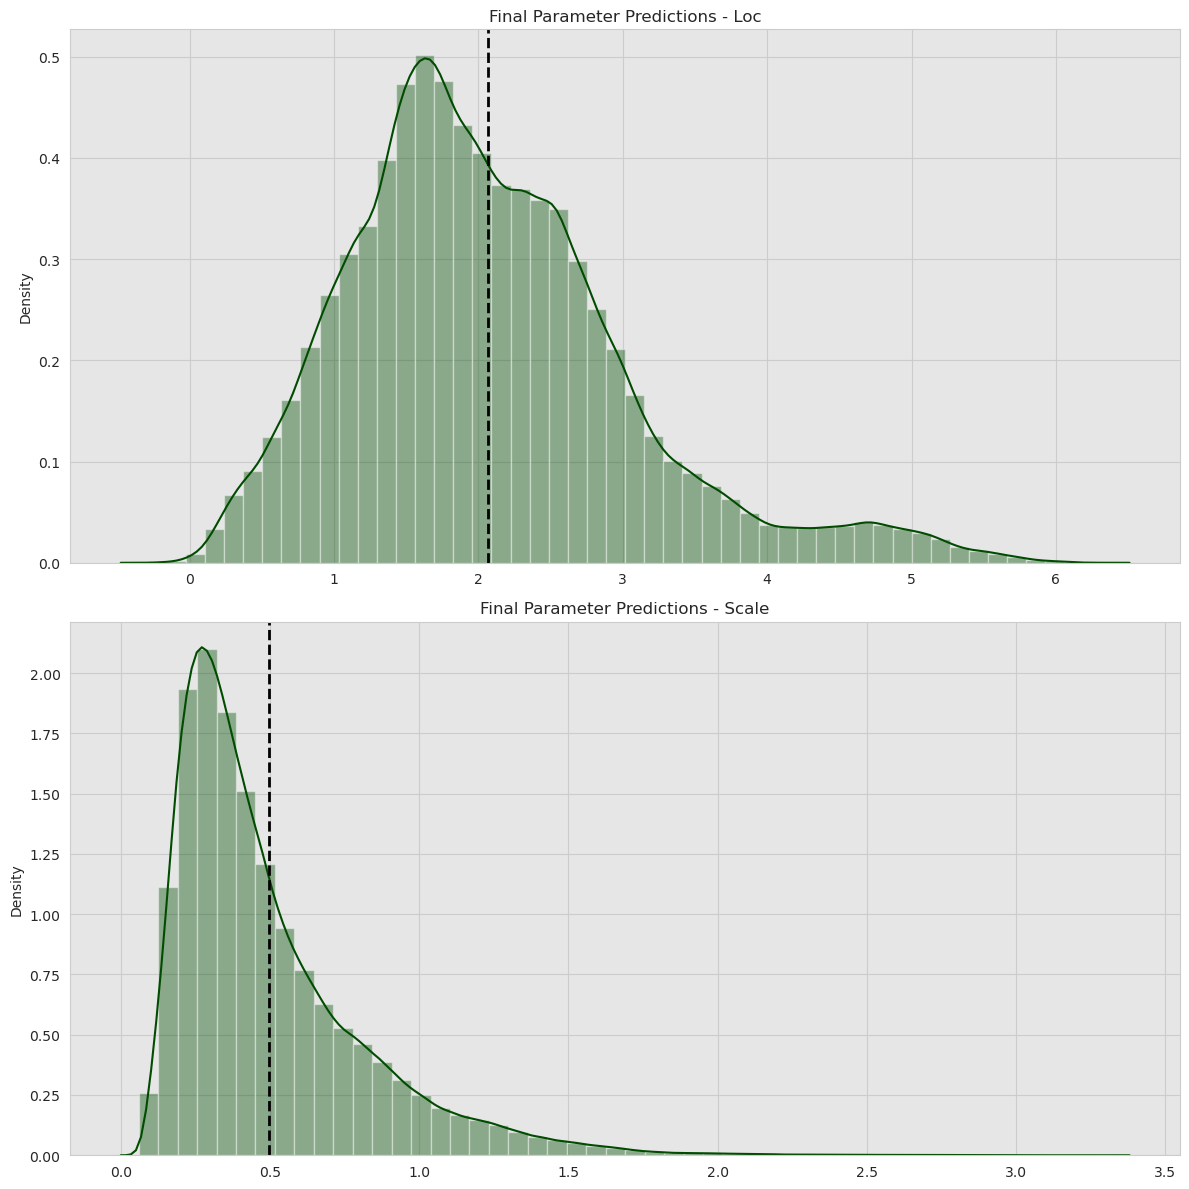

In [16]:
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
if model.config.num_mixture_components > 1:
    sns.set_style("whitegrid", {"axes.facecolor": ".9"})
    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(5*2, 4*4))
    for i, (final_param_name, final_param_pred) in enumerate(
            zip(
                ["loc_1", "loc_2", "scale_1", "scale_2",],
                [
                    final_params[..., 0],
                    final_params[..., 1],
                    final_params[..., 2],
                    final_params[..., 3],
                ]
            )
    ):
        for j in range(final_param_pred.shape[1]):
            sns.kdeplot(
                final_param_pred[:, j],
                ax=ax[i, 0]
            )
        sns.kdeplot(
            final_param_pred.mean(axis=1),
            ax=ax[i, 1],
            label=final_param_name
        )
        fig.suptitle(f"Final Parameter Predictions (over MCMC samples)", fontsize=12)
        ax[i, 0].grid(True)
        ax[i, 1].grid(True)

    plt.tight_layout()
    plt.show()
else:
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(5*2, 4*2))
    for i, (final_param_name, final_param_pred) in enumerate(
            zip(
                ["loc", "scale"],
                [final_params[..., 0], final_params[..., 1]]
            )
    ):
        for j in range(final_param_pred.shape[1]):
            sns.kdeplot(
                final_param_pred[:, j],
                ax=ax[i, 0]
            )

        sns.kdeplot(
            final_param_pred.mean(axis=0),
            ax=ax[i, 1]
        )
        fig.suptitle(f"Final Parameter Predictions - {final_param_name.title()}", fontsize=12)
        ax[i, 0].grid(True)
        ax[i, 1].grid(True)

    plt.tight_layout()
    plt.show()

In [21]:
def plot_feature_contributions(
        num_features: dict,
        cat_features: dict,
        interaction_features: dict,
        submodel_contributions: dict,
):
    """
    Plots feature contributions for numerical, categorical, and interaction features.
    Now includes a separate heatmap panel for the uncertainty of interaction features.
    Args:
        num_features (Dict[str, jnp.ndarray]):
            Dictionary of numerical features.
        cat_features (Dict[str, jnp.ndarray]):
            Dictionary of categorical features.
        interaction_features (Dict[str, jnp.ndarray]):
            Dictionary of interaction features.
        submodel_contributions (Dict[str, np.ndarray]):
            Dictionary of feature contributions with keys as feature names and values
            as numpy arrays of shape [num_samples, batch_size].
        target (jnp.ndarray):
            Target variable.
        aleatoric_uncertainty (Dict[str, jnp.ndarray]):
            Dictionary of aleatoric uncertainty estimates for each feature.
    """

    sns.set_style("whitegrid", {"axes.facecolor": ".9"})
    # Plot numerical features
    if num_features:
        num_plots = len(num_features)
        fig, ax = plt.subplots(
            nrows=num_plots, ncols=2,
            figsize=(12*2, 6 * num_plots),
            squeeze=False
        )
        for i, (feature_name, feature_array) in enumerate(num_features.items()):
            feature_values = np.array(feature_array).flatten()  # Convert JAX array to NumPy

            # Shape: [num_mcmc_samples, batch_size, network_output_dim]
            contributions = submodel_contributions[feature_name]

            # [batch_size, network_output_dim]
            mean_contribution_all_params = contributions.mean(axis=0)
            for j in [0, 1]:
                mean_param_contribution = mean_contribution_all_params[:, j]

                # Create vertical colored bars with color intensity based on density
                sorted_idx = np.argsort(feature_values)
                feature_values_sorted = feature_values[sorted_idx]
                mean_param_contribution_sorted = mean_param_contribution[sorted_idx]

                # Plot the centered partial contributions.
                sns.lineplot(
                    x=feature_values_sorted,
                    y=mean_param_contribution_sorted,
                    color=GREEN_RGB_COLORS[0],
                    label="Mean Output Parameter Contribution",
                    ax=ax[i, j]
                )

                uncertainty = np.std(submodel_contributions[feature_name][:, :, j], axis=0)[sorted_idx]
                ax[i,j].fill_between(
                    feature_values_sorted,
                    mean_param_contribution_sorted - 1.96 * uncertainty,
                    mean_param_contribution_sorted + 1.96 * uncertainty,
                    alpha=0.3,
                    color=GREEN_RGB_COLORS[-5],
                    label="Epistemic Uncertainty - 95% Interval"
                )

                num_bins = 30
                counts, bin_edges = np.histogram(feature_values, bins=num_bins)
                norm_counts = counts / counts.max()
                fixed_height = ax[i,j].get_ylim()[1] - ax[i,j].get_ylim()[0]
                for k in range(num_bins):
                    ax[i,j].bar(
                        bin_edges[k],
                        height=fixed_height,
                        bottom=ax[i,j].get_ylim()[0],
                        width=bin_edges[k + 1] - bin_edges[k],
                        color=plt.cm.Blues(norm_counts[k]),
                        alpha=0.3
                    )

                ax[i,j].set_xlabel(f"{feature_name}", fontsize=12)
                ax[i,j].set_ylabel("Feature Contribution", fontsize=12)
                ax[i,j].set_title(f"Feature Contribution for {feature_name}", fontsize=12)
                ax[i,j].legend(loc='best', fontsize=12, frameon=False)
                ax[i,j].grid(True)

        plt.tight_layout()
        plt.savefig('num_feature_contributions.png')
        plt.show()

In [18]:
batch_iter = model.data_loader.iter(
    "test",
    batch_size=None
)
data_dict = next(batch_iter)  # First and only batch.
num_features = data_dict["feature"]["numerical"]
cat_features = data_dict["feature"]["categorical"]
target = data_dict["target"]

interaction_feature_information = {}
all_features = {**num_features, **cat_features}
for interaction_name in submodel_contributions.keys():
    if ":" not in interaction_name:
        continue

    feature_names = interaction_name.split(":")
    interaction_feature_information[interaction_name] = jnp.concatenate(
        [jnp.expand_dims(all_features[name], axis=-1) for name in feature_names],
        axis=-1
    )

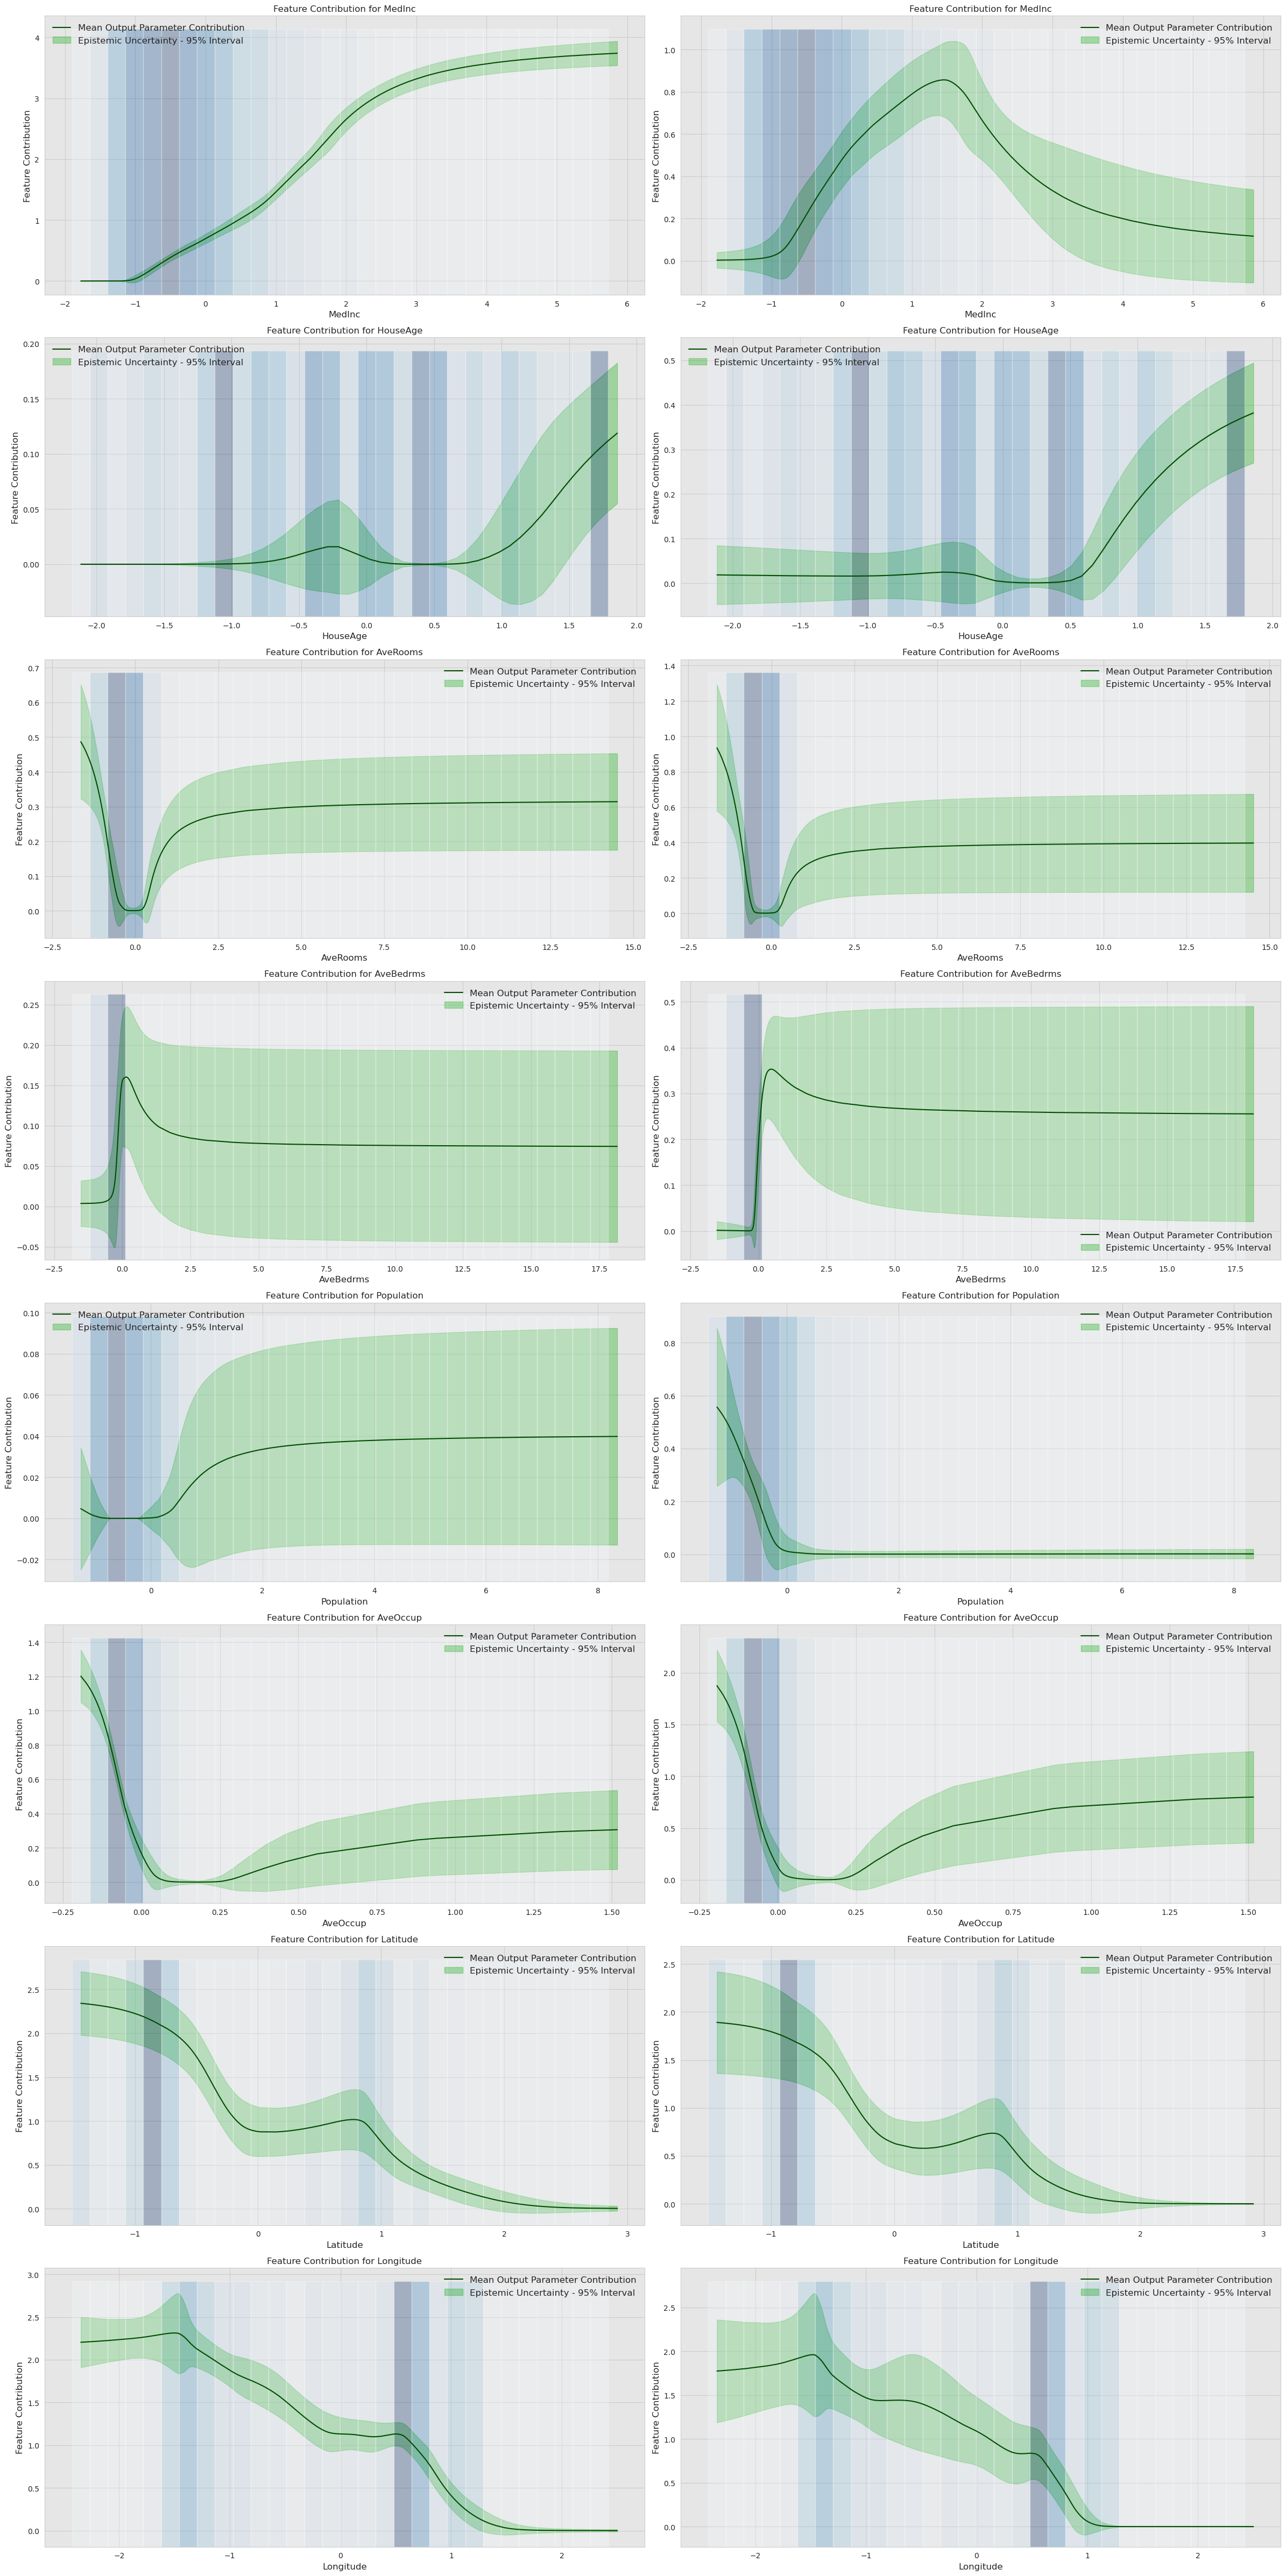

In [23]:
plot_feature_contributions(
        num_features=num_features,
        cat_features=cat_features,
        interaction_features=interaction_feature_information,
        submodel_contributions=submodel_contributions,
)

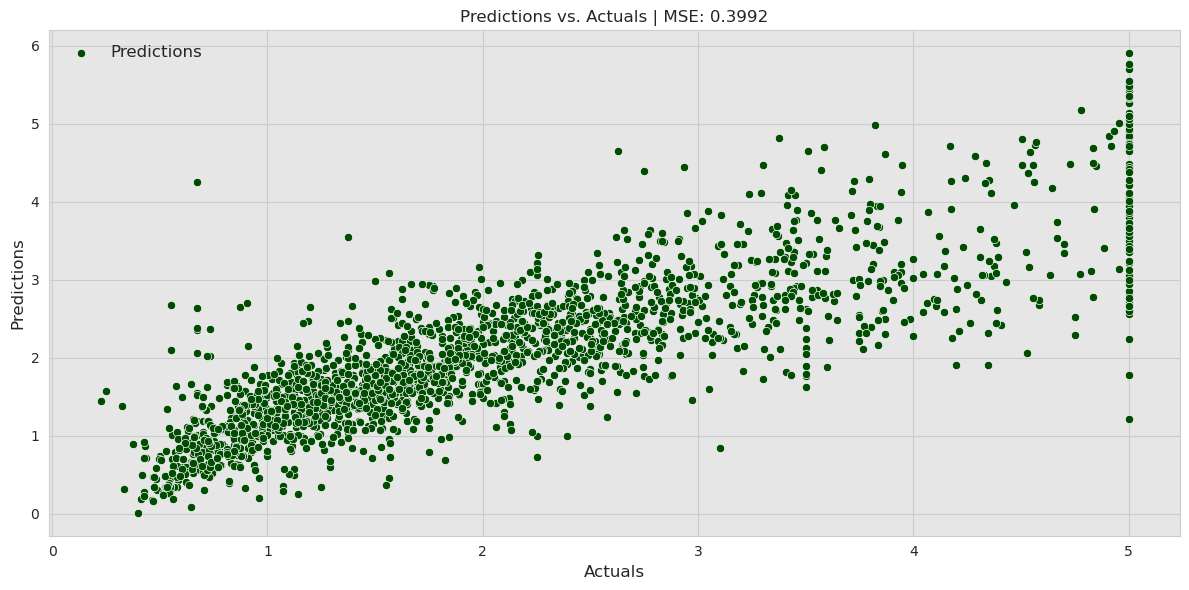

In [30]:
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12*2, 6))
x = np.linspace(-3, 3, 1000)
y_test = next(model.data_loader.iter(split="test", batch_size=None))["target"]

if model.config.num_mixture_components > 1:
    N = len(y_test)
    density = np.zeros_like(x)
    for i in range(N):
        # Mixture density for the i-th prediction:
        density_i = final_alpha_1[i] * norm.pdf(x, final_loc_1[i], final_scale_1[i]) + \
                    final_alpha_2[i] * norm.pdf(x, final_loc_2[i], final_scale_2[i])
        density += density_i

    density /= N  # Average density

    sns.lineplot(x=x, y=density, label="Predictive Mixture Density", color='blue', ax=ax[0])
    final_loc = final_alpha_1*final_loc_1+final_alpha_2*final_loc_2
else:
    ax[0].plot(
        x,
        norm.pdf(
            x,
            loc=final_loc.mean(),
            scale=final_scale.mean()
        ),
        label=f"Estimated | "
              f"Mean: {final_loc.mean():.4f}, "
              f"Std: {final_scale.mean():.4f}",
    )

sns.distplot(
    y_test,
    color=GREEN_RGB_COLORS[0],
    label=f"True | "
          f"Mean: {y_test.mean():.4f}, "
          f"Std: {y_test.std():.4f}",
    ax=ax[0],
    hist=True
)
ax[0].set_title("Estimated vs Actual Gaussian Distribution", fontsize=12)
ax[0].set_xlabel("Y", fontsize=12)
ax[0].set_ylabel("Density", fontsize=12)
ax[0].legend(loc='best', fontsize=12, frameon=False)
ax[0].grid(True)

# Plot the predictions vs. actuals.
# Plot the y=x line dotted.
sns.lineplot(
    x=y_test,
    y=y_test,
    color="black",
)
sns.scatterplot(
    x=y_test,
    y=final_loc,
    color=GREEN_RGB_COLORS[0],
    label="Predictions",
    ax=ax[1]
)
ax[1].set_xlabel("Actuals", fontsize=12)
ax[1].set_ylabel("Predictions", fontsize=12)
ax[1].set_title(
    f"Predictions vs. Actuals | "
    f"MSE: {np.mean((y_test - final_loc) ** 2):.4f}",
    fontsize=12
)
ax[1].legend(loc='best', fontsize=12, frameon=False)
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [45]:
model.plot_posterior_samples()

AttributeError: 'dict' object has no attribute '_chains_rng_keys'

In [ ]:
import arviz as az

az_trace = az.from_numpyro(model._mcmc,)
az.plot_trace(az_trace)
plt.show()

In [41]:
import cloudpickle
import gzip 
import lzma

model_name = "california_housing_5Chain_256_256_128_NoInteraction_model"
posterior_samples = model.posterior_samples
np.savez(f"{model_name}_posterior_samples.npz", **posterior_samples)

with lzma.open(f"{model_name}.pkl.xz", "wb") as f:
    cloudpickle.dump(model, f)

with gzip.open(f"{model_name}.pkl.gz", "rb") as f:
    loaded_model = cloudpickle.load(f)